In [6]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
%matplotlib inline
import numpy as np

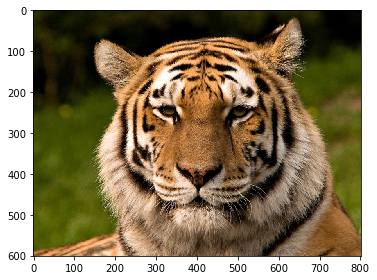

In [7]:
img = imread('tiger-color.png')
imshow(img)

In [8]:
def RGBtoYUV(img):# Перевод из RGB в YUV
    img_f = img_as_float(img.copy())
    yuv = img_f.copy()
    yuv[:,:,0] = img_f[:,:,0]*0.2126 + img_f[:,:,1]*0.7152 + img_f[:,:,2]*0.0722
    yuv[:,:,1] = -img_f[:,:,0]*0.0999 - img_f[:,:,1]*0.3360 + img_f[:,:,2]*0.4360
    yuv[:,:,2] = img_f[:,:,0]*0.6150 - img_f[:,:,1]*0.5586 - img_f[:,:,2]*0.0563
    return yuv
def YUVtoRGB(yuv):# Перевод из YUV в RGB
    img_f = yuv.copy()
    img_f[:,:,0] = yuv[:,:,0] + 1.2803 * yuv[:,:,2]
    img_f[:,:,1] = yuv[:,:,0] - 0.2148 * yuv[:,:,1]  - 0.3805 * yuv[:,:,2]
    img_f[:,:,2] = yuv[:,:,0] + 2.1279 * yuv[:,:,1]
    img_f = np.clip(img_f, 0, 1)
    return img_f
yuv = RGBtoYUV(img)

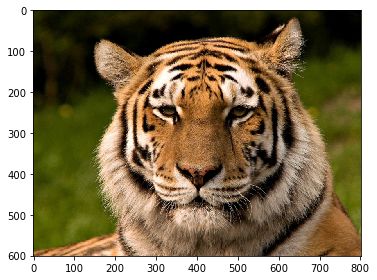

In [9]:
#Децимация
def toDEC(yuv, n):
    yuv = RGBtoYUV(img)
    height = [i for i in range(yuv.shape[0]) if i%n==0]
    width = [i for i in range(yuv.shape[1]) if i%n==0]
    DEC = yuv.copy()
    DEC_Y = DEC[:, :, 0]
    for i in range(len(height)):
        for j in range(len(width)):
            for k in range(n):
                for k2 in range(n):
                    try:
                        DEC[height[i] + k, width[j] + k2, 1] = yuv[height[i], width[j], 1]
                        DEC[height[i] + k, width[j] + k2, 2] = yuv[height[i], width[j], 2]
                    except:
                        pass
    DEC_U = DEC[:, :, 1]
    DEC_V = DEC[:, :, 2]
    return YUVtoRGB(np.dstack([DEC_Y, DEC_U, DEC_V]))
DEC = toDEC(img, 2)
imshow(DEC)

In [10]:
imsave('decimial.png', img_as_ubyte(DEC))